In [23]:
from bs4 import BeautifulSoup
import requests
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import classifiers
import pprint
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline

We're going to conduct our analysis on a range of news sources, across mediums and political positions. Roughly, we've organized them into three classes:  Newspapers (e.g. USA Today), Networks (e.g. CNN), and primarily online sources (e.g. Reuters).

In [2]:
newspapers = ['http://www.usatoday.com','http://www.wsj.com','http://www.nytimes.com',\
              'http://www.washingtonpost.com', 'http://www.latimes.com', 'http://www.nypost.com',\
             'http://www.newsday.com', 'http://www.chicagotribune.com', 'http://www.nydailynews.com',\
              'http://www.denverpost.com', 'http://www.chron.com', 'http://www.dallasnews.com',\
              'http://www.bostonglobe.com', 'http://www.seattletimes.com', 'http://www.tampabay.com']

networks = ['http://www.cnn.com', 'http://www.msnbc.com', 'http://www.foxnews.com', 'http://abcnews.go.com',\
           'http://www.cbsnews.com']

online_primary = ['http://www.reuters.com','http://news.yahoo.com', 'http://www.news.aol.com','http://www.huffingtonpost.com',\
              'http://www.theatlantic.com']

In order to search for immigration stories, we're going to use a list of immigration-related root words

In [9]:
immigration_roots = ['immig', 'sessions', 'border', 'migran', 'nielsen', 'asylum']

First, let's analyze the newspapers

In [13]:
newspaper_summary = {}
for paper in newspapers:
    summary ={}
    print "Summary for %s" %paper
    r = requests.get(paper)
    soup = BeautifulSoup(r.text, "html.parser")
    if paper == 'http://www.nypost.com':
        paragraphs = soup.find_all("h3")
    else:
        paragraphs = soup.find_all("p")
    stories_to_read = []
    for item in paragraphs:
        stories_to_read.append(item.get_text())
    for story in stories_to_read:
        story_summary = {}
        text_story = TextBlob(story)
        for phrase in immigration_roots:
            if str(text_story.noun_phrases).find(phrase) > 0:
                story_summary['nouns'] = text_story.noun_phrases
                story_summary['polarity'] = text_story.sentiment.polarity
                story_summary['subjectivity'] = text_story.sentiment.subjectivity
        if len(story_summary)>0:
            pprint.pprint(story_summary)
    pprint.pprint(summary)
    newspaper_summary[paper] = summary
print "Overall Summary"
pprint.pprint(newspaper_summary)

Summary for http://www.usatoday.com
{'nouns': WordList([u'trump', u"'s immigration order"]),
 'polarity': 0.0,
 'subjectivity': 0.0}
{'nouns': WordList([u'immigrant children']),
 'polarity': 0.8,
 'subjectivity': 0.9}
{'nouns': WordList([u'border crisis']), 'polarity': 0.0, 'subjectivity': 0.0}
{'nouns': WordList([u'donald trump', u'immigrant children']),
 'polarity': 0.0,
 'subjectivity': 0.0}
{'nouns': WordList([u'true', u'trump', u'weakest immigration laws']),
 'polarity': -0.02500000000000005,
 'subjectivity': 0.625}
{'nouns': WordList([u'immigrants', u'us unaware', u'family separations']),
 'polarity': 0.0,
 'subjectivity': 0.25}
{'nouns': WordList([u'lewandowski', u'mocks migrant girl', u'down']),
 'polarity': -0.15555555555555559,
 'subjectivity': 0.2888888888888889}
{'nouns': WordList([u'fact', u'border detention', u'immigrant children']),
 'polarity': 0.0,
 'subjectivity': 0.0}
{'nouns': WordList([u'trump', u'signs order', u'immigrant family separations']),
 'polarity': 0.0,
 

In [20]:
overall_polarity = []
subjectivity_scores = []
polarity_scores = []
for paper in newspapers:
    subjectivity = 0
    polarity = 0
    num_stories = 0
    print "Working on %s" %paper
    r = requests.get(paper)
    soup = BeautifulSoup(r.text, "html.parser")
    paragraphs = soup.find_all("p")
    stories_to_read = []
    for item in paragraphs:
        stories_to_read.append(item.get_text())
    for story in stories_to_read:
        text_story = TextBlob(story)
        words_found = 0
        words_checked = 0
        while words_found < 1 and words_checked < len(immigration_roots):
            for phrase in immigration_roots:
                if str(text_story.noun_phrases).find(phrase) > 0:
                    polarity += text_story.sentiment.polarity
                    subjectivity += text_story.sentiment.subjectivity
                    num_stories +=1
                    words_found +=1
                words_checked +=1
    if num_stories > 0:
        paper_subjectivity = subjectivity/num_stories
        paper_polarity = polarity/num_stories
        overall_polarity.append(paper_polarity)
    else:
        paper_subjectivity = "Not enough data"
        paper_polarity = "Not enough data"
    if isinstance(paper_polarity, float):
        print "Subjectivity Score for %s is %s" %(paper, paper_subjectivity)
        print "Polarity Score for %s is %s" %(paper, paper_polarity)
        subjectivity_scores.append(paper_subjectivity)
        polarity_scores.append(paper_polarity)

Working on http://www.usatoday.com
Subjectivity Score for http://www.usatoday.com is 0.214259259259
Polarity Score for http://www.usatoday.com is 0.0946296296296
Working on http://www.wsj.com
Working on http://www.nytimes.com
Subjectivity Score for http://www.nytimes.com is 0.285714285714
Polarity Score for http://www.nytimes.com is -0.1
Working on http://www.washingtonpost.com
Working on http://www.latimes.com
Working on http://www.nypost.com
Working on http://www.newsday.com
Subjectivity Score for http://www.newsday.com is 0.0
Polarity Score for http://www.newsday.com is 0.0
Working on http://www.chicagotribune.com
Subjectivity Score for http://www.chicagotribune.com is 0.274801587302
Polarity Score for http://www.chicagotribune.com is -0.0670386904762
Working on http://www.nydailynews.com
Working on http://www.denverpost.com
Working on http://www.chron.com
Working on http://www.dallasnews.com
Subjectivity Score for http://www.dallasnews.com is 0.0833333333333
Polarity Score for http

In [21]:
grand_polarity = mean(overall_polarity)
print "Overall polarity score for this topic is %s" %grand_polarity

Overall polarity score for this topic is -0.028734843474426803


Let's look at how this plots:

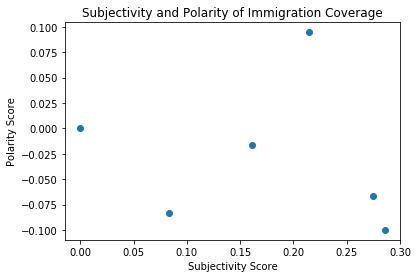

In [28]:
plt.plot(subjectivity_scores, polarity_scores, 'o')
plt.title('Subjectivity and Polarity of Immigration Coverage')
plt.xlabel('Subjectivity Score')
plt.ylabel('Polarity Score')
plt.show()